# 5.9 专题：主成分分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 5.9.1 主成分分析简介

In [2]:
rng = np.random.RandomState(1)

In [6]:
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [7]:
x.shape

(200, 2)

(-0.83450270045022,
 0.9037986728579863,
 -1.8723224456366812,
 1.9423254036648194)

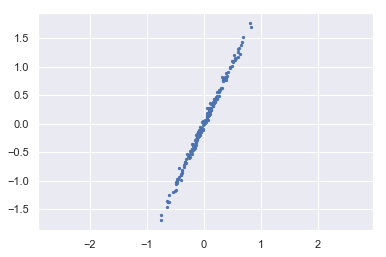

In [19]:
plt.scatter(x[:, 0], x[:, 1], s=5)
plt.axis('equal')

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[ 0.42062227,  0.90723586],
       [-0.90723586,  0.42062227]])

In [14]:
pca.explained_variance_

array([5.68212284e-01, 4.13387219e-04])

为了查看这些数字的含义，在数据图上将这些指标以向量形式画出来，用“成分”定义向量的方向，将“可解释差异”作为向量的平方长度。

In [21]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

In [22]:
pca.mean_

array([-0.00189085, -0.00684802])

(-0.8406859818491899,
 0.909981954256956,
 -1.881843061035757,
 1.9518460190638953)

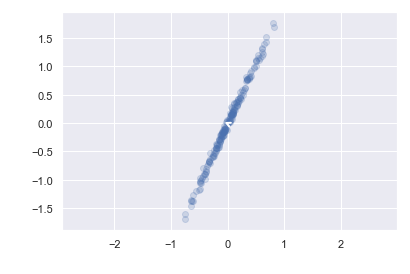

In [20]:
# 画出数据
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')